In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datos_salud.csv')
data.head(20)

,edad,imc,fuma,ejercicio,riesgo_alto
0,58,12.034931,1,0,1
1,48,20.902449,0,0,0
2,34,23.989727,0,0,0
3,62,20.008867,0,1,0
4,27,31.529645,1,1,1
5,40,19.279434,0,1,0
6,58,23.239822,1,0,1
7,38,25.522962,1,1,0
8,42,30.765093,0,0,1
9,30,19.256551,0,0,0


In [11]:
# Variables predictoras y objetivo
X = data[['edad', 'imc', 'fuma', 'ejercicio']]
y = data['riesgo_alto']

In [12]:
# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Entrenar modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predicciones
y_pred_rf = rf.predict(X_test)

In [15]:
# Evaluación
print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(f"Precisión: {accuracy_score(y_test, y_pred_rf):.3f}")

=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      1.00      0.99        81

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[68  1]
 [ 0 81]]
Precisión: 0.993


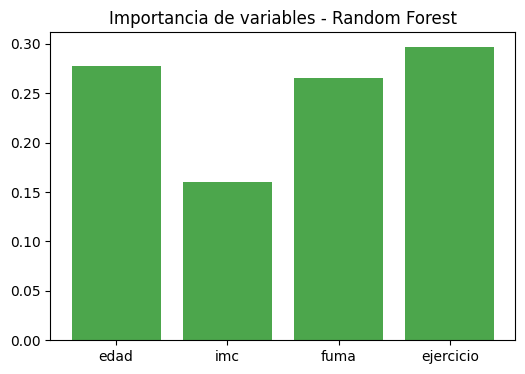

In [16]:
# Importancia de características
plt.figure(figsize=(6,4))
plt.bar(X.columns, rf.feature_importances_, color='green', alpha=0.7)
plt.title("Importancia de variables - Random Forest")
plt.show()

In [18]:
# Entrenar modelo Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [19]:
# Predicciones
y_pred_gb = gb.predict(X_test)

In [20]:
# Evaluación
print("=== Gradient Boosting ===")
print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(f"Precisión: {accuracy_score(y_test, y_pred_gb):.3f}")

=== Gradient Boosting ===
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        69
           1       0.99      1.00      0.99        81

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

[[68  1]
 [ 0 81]]
Precisión: 0.993


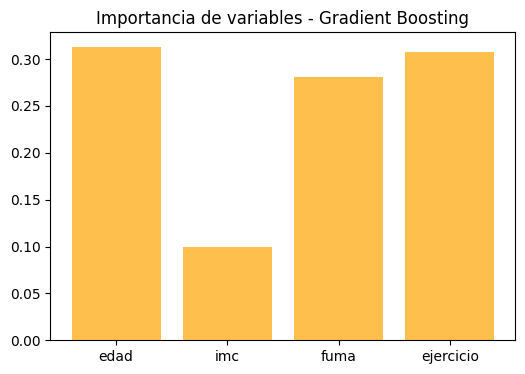

In [21]:
# Importancia de características
plt.figure(figsize=(6,4))
plt.bar(X.columns, gb.feature_importances_, color='orange', alpha=0.7)
plt.title("Importancia de variables - Gradient Boosting")
plt.show()